## DiffRate Visualization
We provide some visualization functions to visualize the effect of DiffRate like in our paper.

In [1]:
import timm
import DiffRate
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from PIL import Image

In [2]:
# We use the timm augreg models here, but you can use any supported implementation.
model_name = "vit_deit_base_patch16_224"
model = timm.create_model(model_name, pretrained=True)

# Source tracing is necessary for visualization!
DiffRate.patch.deit(model, trace_source=True)

In [3]:
input_size = model.default_cfg["input_size"][1]

# Make sure the transform is correct for your model!
transform_list = [
    transforms.Resize(int((256 / 224) * input_size), interpolation=InterpolationMode.BICUBIC),
    transforms.CenterCrop(input_size)
]

# The visualization and model need different transforms
transform_vis  = transforms.Compose(transform_list)
transform_norm = transforms.Compose(transform_list + [
    transforms.ToTensor(),
    transforms.Normalize(model.default_cfg["mean"], model.default_cfg["std"]),
])

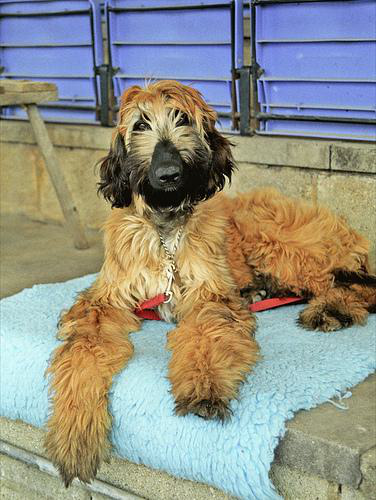

In [4]:
img = Image.open("figures/dog.JPEG")
img_vis = transform_vis(img)
img_norm = transform_norm(img)

img

## Visualize one image
You can play with the `r` value to get different numbers of tokens at the end of the network.

35 tokens at the end


/nvme/chenmengzhao/diffrential_prune_rate_repo_54.2/DiffRate_v1.0/DiffRate/merge.py:69: UserWarning: scatter_reduce() is in beta and the API may change at any time. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525551200/work/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1615.)
  dst = dst.scatter_reduce(-2, dst_idx.expand(n, compress_number, c), src, reduce=mode)
/nvme/chenmengzhao/diffrential_prune_rate_repo_54.2/DiffRate_v1.0/DiffRate/vis.py:67: RuntimeWarning: invalid value encountered in true_divide
  color = (mask * img).sum(axis=(0, 1)) / mask.sum()


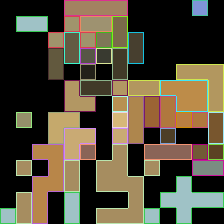

In [5]:
model = model.eval()
# 11.5G compression rate schedule
prune_kept_num = [197,197,197,188,170,154,139,123,107,72,43,3]
merge_kept_num = [197,197,192,178,158,145,127,111,94,50,35,3]

# omit token compression of last block
prune_kept_num[-1] = 197
merge_kept_num[-1] = 197

model.set_kept_num(prune_kept_num, merge_kept_num)

_ = model(img_norm[None, ...])
source = model._diffrate_info["source"]


print(f"{source.shape[1]} tokens at the end")
DiffRate.make_visualization(img_vis, source, patch_size=16, class_token=True)

## Visualize intermediate results
To visualize intermediate results, we can set the number of tokens retained in deeper blocks to a larger value.

111 tokens at the end


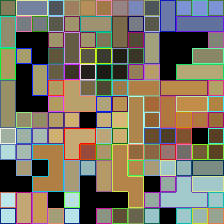

In [7]:
model = model.eval()
# 11.5G compression rate schedule
prune_kept_num = [197,197,197,188,170,154,139,123,107,72,43,3]
merge_kept_num = [197,197,192,178,158,145,127,111,94,50,35,3]

# omit token compression of last block
prune_kept_num[-4:] = [197]*4
merge_kept_num[-4:] = [197]*4

model.set_kept_num(prune_kept_num, merge_kept_num)

_ = model(img_norm[None, ...])
source = model._diffrate_info["source"]


print(f"{source.shape[1]} tokens at the end")
DiffRate.make_visualization(img_vis, source, patch_size=16, class_token=True)